## Crypto Purchase Prediction Model

#### Load and view data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('crypto_hourly_data.csv')

In [3]:
data.head()

,high,low,open,volumefrom,volumeto,close,conversionType,MA20,RSI,MACD,MACD_signal,Lag_1,Lag_2,day,year,month,day_name
0,86211.80,85950.35,85989.18,268.89,2.314940e+07,86098.05,1,85838.8950,57.357045,198.505169,214.747207,85989.18,85897.78,2,2025,3,Sunday
1,86100.60,85739.49,86098.05,325.20,2.793623e+07,85980.07,1,85875.9560,54.837910,187.794138,209.356593,86098.05,85989.18,2,2025,3,Sunday
2,85983.89,85483.91,85980.07,586.12,5.028535e+07,85702.44,1,85901.4430,49.345592,155.115077,198.508290,85980.07,86098.05,2,2025,3,Sunday
3,85892.38,85047.82,85702.44,1372.12,1.170603e+08,85104.24,1,85891.7015,40.040182,80.024474,174.811527,85702.44,85980.07,2,2025,3,Sunday
4,88662.04,85067.08,85104.24,6871.29,6.000891e+08,87433.23,1,85990.3700,66.515353,206.069220,181.063066,85104.24,85702.44,2,2025,3,Sunday


In [4]:
data = data[25:]

#### clean data

In [5]:
data.isna().sum()

high              0
low               0
open              0
volumefrom        0
volumeto          0
close             0
conversionType    0
MA20              0
RSI               0
MACD              0
MACD_signal       0
Lag_1             0
Lag_2             0
day               0
year              0
month             0
day_name          0
dtype: int64

#### Handle Datetime feature

In [6]:
data

,high,low,open,volumefrom,volumeto,close,conversionType,MA20,RSI,MACD,MACD_signal,Lag_1,Lag_2,day,year,month,day_name
25,93229.03,92654.50,92713.38,1523.68,1.416616e+08,92994.05,1,93078.9935,60.600419,1019.008796,1310.959829,92713.38,92526.89,3,2025,3,Monday
26,93663.56,92860.40,92994.05,1543.86,1.439753e+08,93571.95,1,93051.0455,63.303437,1034.435412,1255.654946,92994.05,92713.38,3,2025,3,Monday
27,93708.94,89157.47,93571.95,7951.87,7.273265e+08,89189.29,1,92871.0050,40.571111,685.119451,1141.547847,93571.95,92994.05,3,2025,3,Monday
28,91252.06,89130.39,89189.29,7440.02,6.715835e+08,89969.60,1,92692.9645,44.399445,465.878178,1006.413913,89189.29,93571.95,3,2025,3,Monday
29,90674.68,89608.59,89969.60,3148.35,2.836649e+08,90113.31,1,92480.3500,45.100871,300.262842,865.183699,89969.60,89189.29,3,2025,3,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,110845.91,110398.94,110842.09,547.57,6.052678e+07,110506.93,1,111197.3505,47.114141,264.284964,465.657610,110842.09,110838.42,23,2025,5,Friday
1964,110841.96,110506.86,110506.93,384.61,4.257316e+07,110718.55,1,111183.4980,49.799819,219.573419,416.440772,110506.93,110842.09,23,2025,5,Friday
1965,111007.46,110714.46,110718.55,180.52,2.001289e+07,110928.72,1,111149.0915,52.385937,198.806444,372.913906,110718.55,110506.93,23,2025,5,Friday
1966,111366.36,110907.00,110928.72,339.55,3.773857e+07,111321.52,1,111168.2850,56.859128,211.604894,340.652104,110928.72,110718.55,23,2025,5,Friday


In [8]:
data.drop(['conversionType'], axis = 1,inplace = True)
data.dropna(inplace = True)

##   Current Feature Categories
The features in my dataset and the information they carry

:

| **Feature**               | **Type**              | **What it tells the model**                                           |
|---------------------------|-----------------------|------------------------------------------------------------------------|
| `high`, `low`, `open`, `close` | Price action         | Basic price movements within a timeframe                              |
| `volumefrom`, `volumeto` | Volume activity       | How much is being traded (momentum, pressure)                         |
| `MA20`                    | Trend Indicator       | 20-period moving average, shows direction                             |
| `RSI`                     | Momentum Indicator    | Overbought/Oversold levels                                            |
| `MACD`, `MACD_signal`     | Trend Reversal        | MACD line vs signal line = bullish/bearish crossovers                 |
| `Lag_1`, `Lag_2`          | Lag features          | Recent past closing prices, gives memory to the model     r your model.


In [9]:
data.head(5)

,high,low,open,volumefrom,volumeto,close,MA20,RSI,MACD,MACD_signal,Lag_1,Lag_2,day,year,month,day_name
25,93229.03,92654.50,92713.38,1523.68,1.416616e+08,92994.05,93078.9935,60.600419,1019.008796,1310.959829,92713.38,92526.89,3,2025,3,Monday
26,93663.56,92860.40,92994.05,1543.86,1.439753e+08,93571.95,93051.0455,63.303437,1034.435412,1255.654946,92994.05,92713.38,3,2025,3,Monday
27,93708.94,89157.47,93571.95,7951.87,7.273265e+08,89189.29,92871.0050,40.571111,685.119451,1141.547847,93571.95,92994.05,3,2025,3,Monday
28,91252.06,89130.39,89189.29,7440.02,6.715835e+08,89969.60,92692.9645,44.399445,465.878178,1006.413913,89189.29,93571.95,3,2025,3,Monday
29,90674.68,89608.59,89969.60,3148.35,2.836649e+08,90113.31,92480.3500,45.100871,300.262842,865.183699,89969.60,89189.29,3,2025,3,Monday


#### Decide what you're classifying:

#### 📈 Strategy Signal Table

This table outlines different trading strategies with their corresponding buy and sell signal
However we would be working with Future return strategy " If future close price > current by X% "s.

| **Strategy**           | **Buy Signal**                                           | **Sell Signal**                                          |
|------------------------|----------------------------------------------------------|----------------------------------------------------------|
| **Future Return**      | If future close price > current by X%                   | If future close price < current by X%                   |
| **Technical Indicator**| RSI < 30 and MACD crosses above signal line             | RSI > 70 and MACD crosses below signal line             |
| **Trend**              | Next N periods are higher                                | Next N periods are lower                                |


In [10]:
data['close'].head()

25    92994.05
26    93571.95
27    89189.29
28    89969.60
29    90113.31
Name: close, dtype: float64

In [11]:
data.dropna(inplace=True)
data['future_return'] = data['close'].shift(-3) / data['close'] - 1
data['target'] = data['future_return'].apply(lambda x: 1 if x > 0.01 else (0 if x < -0.01 else 2)).astype('i1')



In [12]:
data.isna().sum()

high             0
low              0
open             0
volumefrom       0
volumeto         0
close            0
MA20             0
RSI              0
MACD             0
MACD_signal      0
Lag_1            0
Lag_2            0
day              0
year             0
month            0
day_name         0
future_return    3
target           0
dtype: int64

In [13]:
import warnings
warnings.filterwarnings("ignore")
data.dropna(inplace =True)

In [14]:
data['target'] #.head() #.shift(-1)

25      0
26      0
27      1
28      0
29      0
       ..
1960    2
1961    2
1962    2
1963    2
1964    2
Name: target, Length: 1940, dtype: int8

#### Encode day-name

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()   #intialize encoder
data['day_name'] = encoder.fit_transform(data['day_name']).astype('i1')

In [17]:
data.head()

,high,low,open,volumefrom,volumeto,close,MA20,RSI,MACD,MACD_signal,Lag_1,Lag_2,day,year,month,day_name,future_return,target
25,93229.03,92654.50,92713.38,1523.68,1.416616e+08,92994.05,93078.9935,60.600419,1019.008796,1310.959829,92713.38,92526.89,3,2025,3,1,-0.032523,0
26,93663.56,92860.40,92994.05,1543.86,1.439753e+08,93571.95,93051.0455,63.303437,1034.435412,1255.654946,92994.05,92713.38,3,2025,3,1,-0.036962,0
27,93708.94,89157.47,93571.95,7951.87,7.273265e+08,89189.29,92871.0050,40.571111,685.119451,1141.547847,93571.95,92994.05,3,2025,3,1,0.011857,1
28,91252.06,89130.39,89189.29,7440.02,6.715835e+08,89969.60,92692.9645,44.399445,465.878178,1006.413913,89189.29,93571.95,3,2025,3,1,-0.031914,0
29,90674.68,89608.59,89969.60,3148.35,2.836649e+08,90113.31,92480.3500,45.100871,300.262842,865.183699,89969.60,89189.29,3,2025,3,1,-0.050883,0


## Build model

In [18]:
data.shape

(1940, 18)

In [19]:
#Define x and y
y = data['target']
x = data.drop(['target','future_return'], axis = 1)


#### Split data into train and test

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [22]:
modelXGB = XGBClassifier(n_estimators=20,
                       max_depth = 20,
                        learning_rate = 0.03 ,
                         n_jobs = 60,
                        )
modelXGB.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=60, num_parallel_tree=None, ...)

In [23]:
print(f' model performance on train {modelXGB.score(x_train,y_train)} \n',
    f'model performance on test {modelXGB.score(x_test, y_test)}')

 model performance on train 0.9568298969072165 
 model performance on test 0.8505154639175257


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
modelLR = LogisticRegression(penalty='l2', n_jobs=50)

In [26]:
modelLR.fit(x_train, y_train)

LogisticRegression(n_jobs=50)

In [27]:
temp = x_test.copy()  
temp['target'] = y_test
temp.dropna(inplace =True)

In [28]:
x_test = temp.drop('target', axis = 1)
y_test = temp['target']

In [29]:
modelLR.score(x_train,y_train), modelLR.score(x_test,y_test)

(0.8182989690721649, 0.8556701030927835)

In [30]:
list(modelXGB.predict(x_test[5:15])), y_test[5:15]

([2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 1582    2
 1583    2
 1584    2
 1585    2
 1586    2
 1587    2
 1588    2
 1589    2
 1590    2
 1591    2
 Name: target, dtype: int8)

## Handle overfitting

#### Check class balance

In [31]:
y_train.value_counts()

target
2    1271
1     149
0     132
Name: count, dtype: int64

#### Check for correlation

In [32]:
x.corr().head()

,high,low,open,volumefrom,volumeto,close,MA20,RSI,MACD,MACD_signal,Lag_1,Lag_2,day,year,month,day_name
high,1.000000,0.998330,0.999037,-0.109699,-0.027957,0.999007,0.991669,0.256612,0.342150,0.357106,0.999037,0.997616,0.062670,NaN,0.760617,0.018644
low,0.998330,1.000000,0.999003,-0.158045,-0.076690,0.999227,0.991212,0.259126,0.346389,0.360865,0.999003,0.997352,0.073701,NaN,0.763318,0.015466
open,0.999037,0.999003,1.000000,-0.133735,-0.052358,0.998320,0.992315,0.247175,0.342511,0.359458,1.000000,0.998315,0.068116,NaN,0.761900,0.015469
volumefrom,-0.109699,-0.158045,-0.133735,1.000000,0.993088,-0.136974,-0.128394,-0.027103,-0.082509,-0.077061,-0.133735,-0.130608,-0.188004,NaN,-0.119016,0.062558
volumeto,-0.027957,-0.076690,-0.052358,0.993088,1.000000,-0.055514,-0.049536,0.010488,-0.035476,-0.029773,-0.052358,-0.049758,-0.174652,NaN,-0.066571,0.067634


#### Combine variance inflation factor with correlation matrix to detect which features to select

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
x.isna().sum()

high           0
low            0
open           0
volumefrom     0
volumeto       0
close          0
MA20           0
RSI            0
MACD           0
MACD_signal    0
Lag_1          0
Lag_2          0
day            0
year           0
month          0
day_name       0
dtype: int64

In [36]:
vif = variance_inflation_factor
df = pd.DataFrame()
df["Feature"] = x.columns
df['VIF'] = [vif(x, a) for a in range(x.shape[1]) ]

In [37]:
df

,Feature,VIF
0,high,2387.661599
1,low,2605.260278
2,open,inf
3,volumefrom,158.471209
4,volumeto,156.798592
5,close,3401.035302
6,MA20,6044.569517
7,RSI,6.235004
8,MACD,547.313140
9,MACD_signal,316.585624


#### Drop unwanted features and rebuild model

In [39]:
x1 = x.drop(['high', 'open', 'Lag_1', 'MA20',  'close', 'year'], axis = 1)

In [40]:
x1.corr()

,low,volumefrom,volumeto,RSI,MACD,MACD_signal,Lag_2,day,month,day_name
low,1.000000,-0.158045,-0.076690,0.259126,0.346389,0.360865,0.997352,0.073701,0.763318,0.015466
volumefrom,-0.158045,1.000000,0.993088,-0.027103,-0.082509,-0.077061,-0.130608,-0.188004,-0.119016,0.062558
volumeto,-0.076690,0.993088,1.000000,0.010488,-0.035476,-0.029773,-0.049758,-0.174652,-0.066571,0.067634
RSI,0.259126,-0.027103,0.010488,1.000000,0.791006,0.640680,0.230864,0.023053,0.180092,0.105377
MACD,0.346389,-0.082509,-0.035476,0.791006,1.000000,0.943092,0.337097,0.074651,0.240320,0.138252
MACD_signal,0.360865,-0.077061,-0.029773,0.640680,0.943092,1.000000,0.359646,0.073649,0.246323,0.123118
Lag_2,0.997352,-0.130608,-0.049758,0.230864,0.337097,0.359646,1.000000,0.067661,0.760883,0.013799
day,0.073701,-0.188004,-0.174652,0.023053,0.074651,0.073649,0.067661,1.000000,-0.262042,-0.023284
month,0.763318,-0.119016,-0.066571,0.180092,0.240320,0.246323,0.760883,-0.262042,1.000000,0.010173
day_name,0.015466,0.062558,0.067634,0.105377,0.138252,0.123118,0.013799,-0.023284,0.010173,1.000000


In [41]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size = 0.8, random_state = 69)

In [42]:
modelXGB1 = XGBClassifier(n_estimators=20,
                       max_depth = 5,
                        learning_rate = 0.008 ,
                         n_jobs = 10,
                        )

In [43]:
modelXGB1.fit(x_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.008, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=10, num_parallel_tree=None, ...)

In [44]:
x_train1.columns

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close', 'MA20', 'RSI',
       'MACD', 'MACD_signal', 'Lag_1', 'Lag_2', 'day', 'year', 'month',
       'day_name'],
      dtype='object')

In [45]:
modelXGB1.score(x_train1,y_train1 ), modelXGB1.score(x_test1,y_test1 )

(0.8576030927835051, 0.8195876288659794)

#### Output feature importances

In [46]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier()
modelRFC.fit(x_train1, y_train1)

importances = modelRFC.feature_importances_

feature_names = x_train1.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


        Feature  Importance
3    volumefrom    0.092265
4      volumeto    0.092074
9   MACD_signal    0.082840
8          MACD    0.082417
7           RSI    0.082368
6          MA20    0.078834
5         close    0.074887
1           low    0.067973
11        Lag_2    0.067450
0          high    0.063481
2          open    0.061746
10        Lag_1    0.061337
12          day    0.054246
15     day_name    0.026666
14        month    0.011414
13         year    0.000000


In [47]:
x_train1.columns

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close', 'MA20', 'RSI',
       'MACD', 'MACD_signal', 'Lag_1', 'Lag_2', 'day', 'year', 'month',
       'day_name'],
      dtype='object')

In [48]:
modelRFC.score(x_train1, y_train1), modelRFC.score(x_test1, y_test1)

(1.0, 0.8376288659793815)

## Evaluate our best performing model "modelXGB"

Check model performance using confusion matrices and other performance evaluation methods

In [49]:
y_test.value_counts()

target
2    333
1     38
0     17
Name: count, dtype: int64

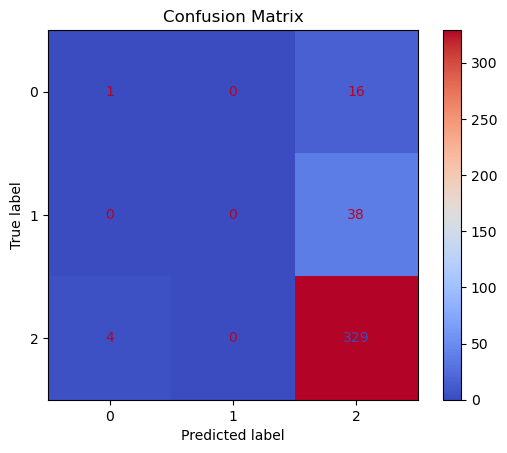

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred = modelXGB.predict(x_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()


#### Using crosss validation

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelXGB, x, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean CV Score: {scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.40979381 0.45360825 0.58505155 0.40463918 0.82731959]
Mean CV Score: 0.5361


####  Permutation Feature Importance

In [60]:
from sklearn.inspection import permutation_importance

result = permutation_importance(modelXGB, x_test, y_test, n_repeats=10, random_state=42)

for i in result.importances_mean.argsort()[::-1]:
    print(f"{x_test.columns[i]}: {result.importances_mean[i]:.4f}")


volumefrom: 0.0111
RSI: 0.0082
MACD: 0.0054
volumeto: 0.0041
day_name: 0.0018
MACD_signal: 0.0018
month: 0.0000
year: 0.0000
Lag_2: 0.0000
Lag_1: 0.0000
MA20: 0.0000
close: 0.0000
open: 0.0000
low: 0.0000
high: 0.0000
day: -0.0021


#### 🧠 Pros and Cons of Future Return Strategy
Pros:
    
    Easy to implement
    
    Directly models the outcome you care about (profit)

Cons:
    
    Can easily cause data leakage if future info isn't dropped
    
    Labels may be noisy if volatility is high or time horizon (like 3 hours) is too short
    


In [62]:
modelXGB.score(x_train, y_train), modelXGB.score(x_test, y_test)

(0.9568298969072165, 0.8505154639175257)